# How should I price auto insurance in the United States?

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Your task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases. You will be using the Python `statsmodels` package to create and analyze these linear models.

In [3]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os
from scipy import stats
import scipy

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## Diving into the data

In [4]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [5]:
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,5,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,6,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,7,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,8,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,9,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


### Exercise 1:

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

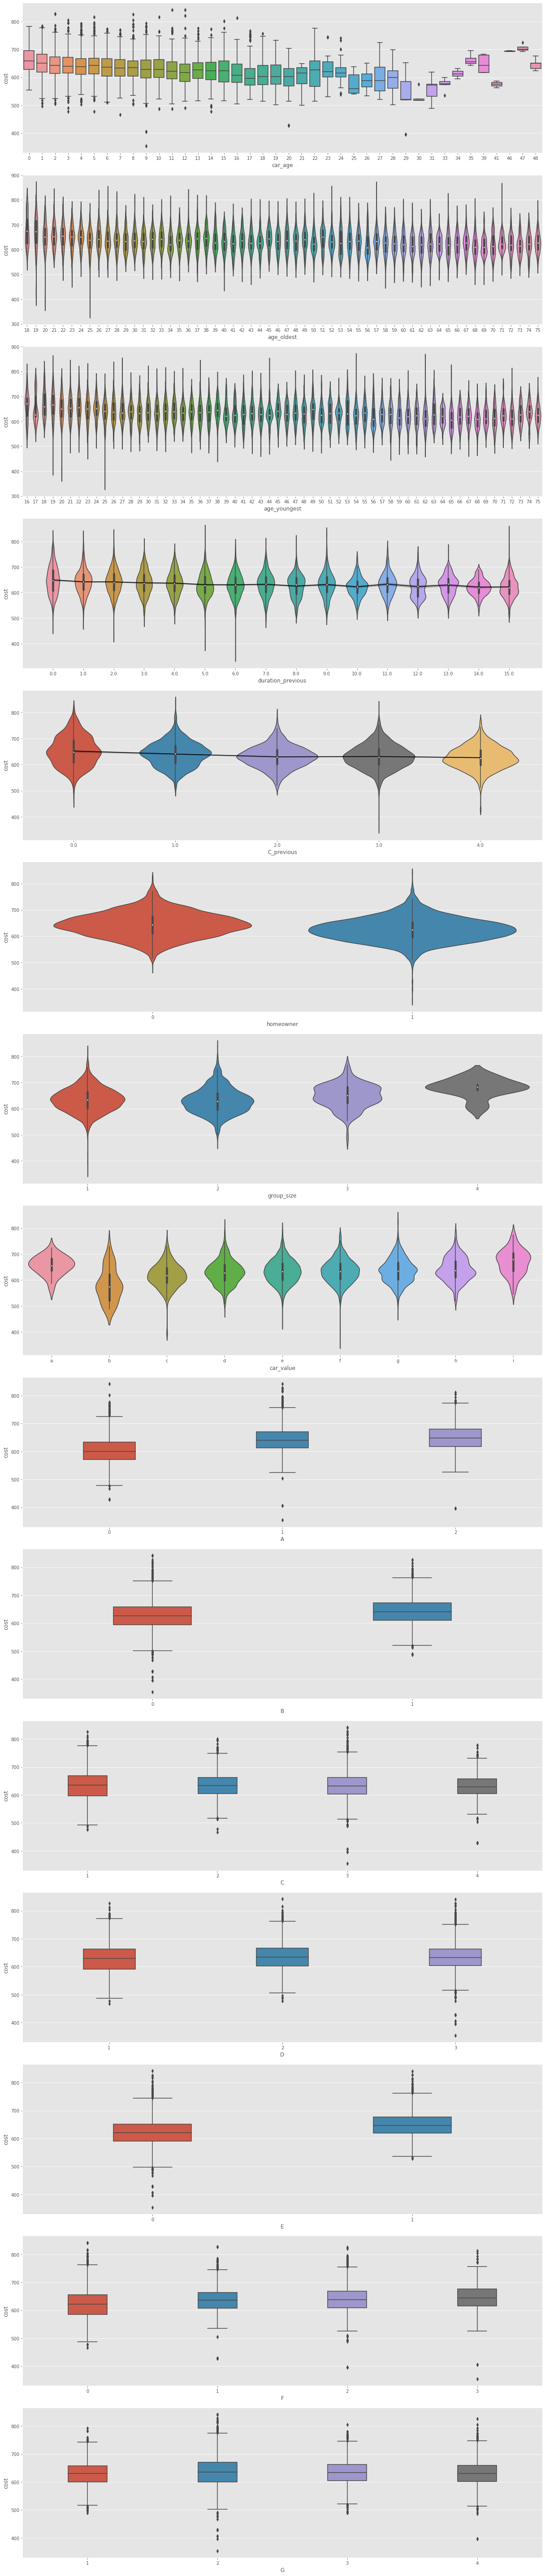

In [6]:
f, axes = plt.subplots(15, 1, figsize=(17, 80))
# plt.figure(figsize=(15,7))
with sns.axes_style("whitegrid"):
    sns.boxplot(x="car_age", y="cost",data=df, ax=axes[0])
    sns.violinplot(x="age_oldest", y="cost",data=df, ax=axes[1])
    sns.violinplot(x="age_youngest", y="cost",data=df, ax=axes[2])
    sns.violinplot(x="duration_previous", y="cost",data=df, ax=axes[3])
    sns.lineplot(x="duration_previous", y="cost",data=df,ax=axes[3],color="black")#, err_style="band"
    
    sns.violinplot(x="C_previous", y="cost",data=df, ax=axes[4])
    sns.lineplot(x="C_previous", y="cost",data=df,ax=axes[4],color="black")#, err_style="band"

    sns.violinplot(x="homeowner", y="cost",data=df, ax=axes[5])
    sns.violinplot(x="group_size", y="cost",data=df, ax=axes[6])

    sns.violinplot(x="car_value", y="cost",data=df, ax=axes[7])


    sns.boxplot(x="A", y="cost",data=df, ax=axes[8], width=0.3)
    sns.boxplot(x="B", y="cost",data=df, ax=axes[9], width=0.3)
    sns.boxplot(x="C", y="cost",data=df, ax=axes[10], width=0.3)
    sns.boxplot(x="D", y="cost",data=df, ax=axes[11], width=0.3)
    sns.boxplot(x="E", y="cost",data=df, ax=axes[12], width=0.3)
    sns.boxplot(x="F", y="cost",data=df, ax=axes[13], width=0.3)
    sns.boxplot(x="G", y="cost",data=df, ax=axes[14], width=0.3)

plt.tight_layout()
plt.show()

In [7]:
df.head()
df.dtypes
df2 = df.copy()
df2.C_previous = df2.C_previous.astype('int64').astype('category')
df2.dtypes
sorted(list(df2.state.unique()))[0]

'AL'

**Answer.**

----------

### Exercise 2:

Convert all categorical data to be in the one-hot encoding format.

In [8]:
columns_to_dummy = ["state","car_value","C_previous","A","B","C","D","E","F","G"]
df_dummy = pd.get_dummies(df2,columns=columns_to_dummy, drop_first=True) #Use drop_first to drop the first category

In [9]:
df_dummy.columns
df_dummy.shape

(15483, 72)

**Answer.**

For this case, I also converted the C_previous column to categorical. Given that C was also categorical.

----------

## Fitting a multiple linear regression

### Exercise 3:

Split your data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

In [10]:
np.random.seed(1337)

ndata = len(df_dummy)

idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = df_dummy.iloc[idx_train] # the training data set
test      = df_dummy.iloc[idx_test]  # the test data set
print(train.shape)
print(test.shape)

(12386, 72)
(3097, 72)


**Answer.**

----------

### Exercise 4:

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`. What is the AIC value?

In [11]:
# df_dummy.drop(["Unnamed: 0"],axis=1,inplace=True)
train = train.drop(["Unnamed: 0"],axis=1)

In [12]:
mod1 = "cost ~"
for col in train.columns:
    if col == "cost":continue
    mod1 = mod1 + f" {col} +"

mod1 = mod1[:-1] #Remove last + symbol

print(mod1)

cost ~ group_size + homeowner + car_age + risk_factor + age_oldest + age_youngest + married_couple + duration_previous + state_AR + state_CO + state_CT + state_DC + state_DE + state_FL + state_GA + state_IA + state_ID + state_IN + state_KS + state_KY + state_MD + state_ME + state_MO + state_MS + state_MT + state_ND + state_NE + state_NH + state_NM + state_NV + state_NY + state_OH + state_OK + state_OR + state_PA + state_RI + state_SD + state_TN + state_UT + state_WA + state_WI + state_WV + state_WY + car_value_b + car_value_c + car_value_d + car_value_e + car_value_f + car_value_g + car_value_h + car_value_i + C_previous_1 + C_previous_2 + C_previous_3 + C_previous_4 + A_1 + A_2 + B_1 + C_2 + C_3 + C_4 + D_2 + D_3 + E_1 + F_1 + F_2 + F_3 + G_2 + G_3 + G_4 


In [13]:
model_all = smf.ols(formula=mod1, data=train).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     138.1
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:13:50   Log-Likelihood:                -61754.
No. Observations:               12386   AIC:                         1.237e+05
Df Residuals:                   12315   BIC:                         1.242e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           674.2890      5.537    121.790      0.000     663.437     685.141
group_size            3.1397      1.486      2.113      0.035       0.227       6.052
homeowner           -14.7283      0.731    -20.140      0.000     -16.162     -13.295
car_age              -0.6696      0.067     -9.949      0.000      -0.802      -0.538
risk_factor          -0.3509      0.229     -1.534      0.125      -0.799       0.097
age_oldest            0.6024      0.064      9.431      0.000       0.477       0.728
age_youngest         -0.9988      0.063    -15.975      0.000      -1.121      -0.876
married_couple       -9.7289      1.396     -6.967      0.000     -12.466      -6.992
duration_previous    -1.5074      0.075    -20.193      0.000      -1.654      -1.361
state_AR              0.1118      3.105      0.036      0.971      -5.975       6.199
state_CO            -11.4342      2.573     -4.444      0.000     -16.477      -6.391
state_CT             28.3066      2.867      9.872      0.000      22.686      33.927
state_DC             36.0608      4.592      7.853      0.000      27.060      45.061
state_DE             33.4801      4.455      7.515      0.000      24.748      42.212
state_FL             10.8087      2.165      4.993      0.000       6.565      15.052
state_GA              6.0555      2.384      2.540      0.011       1.382      10.729
state_IA            -51.4076      3.528    -14.573      0.000     -58.322     -44.493
state_ID            -22.0801      4.130     -5.347      0.000     -30.175     -13.985
state_IN            -11.8647      2.597     -4.569      0.000     -16.955      -6.774
state_KS             -9.3745      4.342     -2.159      0.031     -17.886      -0.863
state_KY             19.6794      2.890      6.810      0.000      14.015      25.344
state_MD             21.2557      2.466      8.621      0.000      16.423      26.089
state_ME            -36.1089      3.947     -9.149      0.000     -43.845     -28.373
state_MO            -23.0511      2.973     -7.753      0.000     -28.879     -17.224
state_MS             -1.5294      3.267     -0.468      0.640      -7.933       4.874
state_MT            -13.5782      6.165     -2.203      0.028     -25.662      -1.494
state_ND              3.0239      6.068      0.498      0.618      -8.870      14.917
state_NE            -14.9808      5.632     -2.660      0.008     -26.020      -3.942
state_NH            -21.3166      3.724     -5.724      0.000     -28.617     -14.016
state_NM             -3.2605      3.781     -0.862      0.389     -10.672       4.151
state_NV             20.9212      2.805      7.459      0.000      15.423      26.419
state_NY             37.8651      2.405     15.746      0.000      33.151      42.579
state_OH             -9.1948      2.308     -3.984      0.000     -13.718

In [14]:
print("The model considering all independent variables has an AIC of ",model_all.aic)

The model considering all independent variables has an AIC of  123650.98344515155


**Answer.**

----------

#### 4.2 

According to `model_all`, which states are most and least expensive?

In [15]:
dir(model_all)
state_coeff = dict()
for k,v in dict(model_all.params).items():
    if "state" in k:
        state_coeff[k] = v

state_coeff = {k: v for k, v in sorted(state_coeff.items(), key=lambda item: item[1])}

state_coeff 

{'state_IA': -51.40761610160703,
 'state_ME': -36.10886485968704,
 'state_WI': -33.237080894653225,
 'state_MO': -23.05114569696068,
 'state_ID': -22.08005199025624,
 'state_NH': -21.316619599001896,
 'state_UT': -18.128461334091078,
 'state_NE': -14.980824839632419,
 'state_SD': -14.526903315626598,
 'state_MT': -13.578237926759762,
 'state_OK': -12.630510654776664,
 'state_TN': -12.422891054704365,
 'state_IN': -11.864669211124035,
 'state_CO': -11.434182787474342,
 'state_OR': -11.049515852786634,
 'state_KS': -9.374488779634135,
 'state_OH': -9.194805632604933,
 'state_NM': -3.2604531298644446,
 'state_WY': -3.1758389331116454,
 'state_MS': -1.5293762488385934,
 'state_AR': 0.11180483622099047,
 'state_WA': 2.8476780254733285,
 'state_ND': 3.0238807618641133,
 'state_GA': 6.05550591142438,
 'state_PA': 9.292480518206318,
 'state_FL': 10.808680351407713,
 'state_KY': 19.67942906122476,
 'state_NV': 20.921168912225916,
 'state_MD': 21.255659002241707,
 'state_RI': 25.458414772971132,

In [16]:
state_coeff['state_NY']-state_coeff['state_IA']

89.27270543322135

**Answer.**

From the model, we can see that the state of New York is the most expensive while Iowa is the least expensive with an average difference in cost between them of around 89.27 USD when accounting for all the other independent variables

----------

#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

In [17]:
vars_to_look = ["group_size","homeowner","car_age","risk_factor","age_oldest","age_youngest","married_couple"]
for var in vars_to_look:
    print (f"The coefficient of {var} is ", model_all.params[f"{var}"])

The coefficient of group_size is  3.1397384259567405
The coefficient of homeowner is  -14.728333697983409
The coefficient of car_age is  -0.6696393181112044
The coefficient of risk_factor is  -0.350879760507918
The coefficient of age_oldest is  0.602381277414985
The coefficient of age_youngest is  -0.9987975848954641
The coefficient of married_couple is  -9.72888771666138


**Answer.**

From the previous analysis we can say:
    
When the group size increases by 1 person, the average cost of the insurance increases by approx. 3.13 USD. This is reasonable, as the insurance covers more people, the price should increase, even after considering the effects of all the other variables.

When the customer is a homeowner, the cost of the insurance decreases by approx. 14.73 USD compared to the price of the insurance when the customer does not have a house, even after accounting for the effect of all the other variables. This might be reasonable since a homeowner is probably recognized as more financially reliable than a person who is not a homeowner.

When the car age is increased by a year, the cost of the insurance is decreased by approx. 0.67 USD after accounting for all the other variables. This is probably due to the fact that an older car has a lower market price due to devaluation. 

When the risk factor is increased by one unit, the cost of the insurance is decreased by approx. 0.35 USD after accounting for all the other variables. This does look counter-intuitive because the a riskier customer might imply higher cost to the insurance company. Nevertheless, we are not told in the dataset if a higher value of the risk_factor implies a higher risk. Also, if that were the case, we can also see that after accounting for all the other variables, the risk factor coefficient tends to compensate for the other ones.

When the age of the oldest member of the group is increased by 1 year, the cost of the insurance is increased in average by 0.60 USD after accounting for all the other variables. This might be related to a higher costs related to accidents when an older person is involved, therefore, a higher risk. This could be a coefficient balancing the negative risk factor coefficient.

When the age of the youngest member of the group is increased by a year, the cost of the insurance is decreased in average by 1.00 USD after accounting for all the other variables. When we compare this behavior to the age_oldest coefficient, it might seem reasonable to explore the effect of the average age of the group. This could be non-linear. One possibility is that there is a mid-age that minimizes the cost of the insurance due to the age. We can also see from the plots done before that the impact of both age_oldest and age_youngest on the cost is oscillatory when not accounting for other variables.

When the customer is married, the cost of the insurance is decreased in average by 9.73 USD compared to a non-married customer after accounting for all the other variables. From the analyzed variables in this exercise, this is the second with biggest impact on the cost right after the "homeowner" variable. This could also be related to the fact that a married person is commonly more financially stable and reliable than a person who is not married.

----------

### Exercise 5:

Which variables from `model_all` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

In [56]:
train.columns

Index(['group_size', 'homeowner', 'car_age', 'risk_factor', 'age_oldest',
       'age_youngest', 'married_couple', 'duration_previous', 'cost',
       'state_AR', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_IA', 'state_ID', 'state_IN', 'state_KS', 'state_KY',
       'state_MD', 'state_ME', 'state_MO', 'state_MS', 'state_MT', 'state_ND',
       'state_NE', 'state_NH', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SD', 'state_TN',
       'state_UT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'car_value_b', 'car_value_c', 'car_value_d', 'car_value_e',
       'car_value_f', 'car_value_g', 'car_value_h', 'car_value_i',
       'C_previous_1', 'C_previous_2', 'C_previous_3', 'C_previous_4', 'A_1',
       'A_2', 'B_1', 'C_2', 'C_3', 'C_4', 'D_2', 'D_3', 'E_1', 'F_1', 'F_2',
       'F_3', 'G_2', 'G_3', 'G_4'],
      dtype='object')

In [57]:
dir(model_all)
print("The variables with p-value less than 5% (statistically significant - Reject Null Hypothesis) are: \n",model_all.pvalues[model_all.pvalues < 0.05/70])

print("\n The variables with p-value greater than 5% (statistically insignificant - Accept Null Hypothesis) are: \n",model_all.pvalues[model_all.pvalues > 0.05/70])

The variables with p-value less than 5% (statistically significant - Reject Null Hypothesis) are: 
 Intercept            0.000000e+00
homeowner            8.823624e-89
car_age              3.113101e-23
age_oldest           4.790745e-21
age_youngest         7.090746e-57
married_couple       3.399250e-12
duration_previous    3.098926e-89
state_CO             8.898090e-06
state_CT             6.695021e-23
state_DC             4.384893e-15
state_DE             6.073469e-14
state_FL             6.024023e-07
state_IA             1.040413e-47
state_ID             9.115406e-08
state_IN             4.954749e-06
state_KY             1.021549e-11
state_MD             7.450019e-18
state_ME             6.630442e-20
state_MO             9.644189e-15
state_NH             1.066447e-08
state_NV             9.283148e-14
state_NY             2.522256e-55
state_OH             6.805507e-05
state_OK             4.008546e-06
state_OR             9.457818e-05
state_PA             2.644773e-05
state_RI        

From the previous exploration, we can see that all the categories from variable "B", "C" and "D", as well as "group_size" and "risk_factor" are statistically insignificant when we take into account the bonferroni correction (for 70 null hypothesis, we divide 0.05/70 to get the corrected acceptance threshold). Despite several states, car value = i, C and G categories are also statistically insignificant. But some of the categories inside each of these variables are significant and therefore we retain them.

Therefore, only variable B, C and D are to be removed.

In [61]:
train2 = train.drop(["B_1","C_2","C_3","C_4","D_2","D_3","group_size","risk_factor"],axis=1)

In [62]:
mod2 = "cost ~"
for col in train2.columns:
    if col == "cost":continue
    mod2 = mod2 + f" {col} +"

mod2 = mod2[:-1] #Remove last + symbol

print(mod2)

cost ~ homeowner + car_age + age_oldest + age_youngest + married_couple + duration_previous + state_AR + state_CO + state_CT + state_DC + state_DE + state_FL + state_GA + state_IA + state_ID + state_IN + state_KS + state_KY + state_MD + state_ME + state_MO + state_MS + state_MT + state_ND + state_NE + state_NH + state_NM + state_NV + state_NY + state_OH + state_OK + state_OR + state_PA + state_RI + state_SD + state_TN + state_UT + state_WA + state_WI + state_WV + state_WY + car_value_b + car_value_c + car_value_d + car_value_e + car_value_f + car_value_g + car_value_h + car_value_i + C_previous_1 + C_previous_2 + C_previous_3 + C_previous_4 + A_1 + A_2 + E_1 + F_1 + F_2 + F_3 + G_2 + G_3 + G_4 


In [63]:
model_sig = smf.ols(formula=mod2, data=train2).fit()
model_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     155.6
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:23:36   Log-Likelihood:                -61762.
No. Observations:               12386   AIC:                         1.237e+05
Df Residuals:                   12323   BIC:                         1.241e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           678.0811      5.295    128.067      0.000     667.703     688.460
homeowner           -14.8200      0.728    -20.367      0.000     -16.246     -13.394
car_age              -0.6611      0.067     -9.853      0.000      -0.793      -0.530
age_oldest            0.6891      0.050     13.819      0.000       0.591       0.787
age_youngest         -1.0846      0.048    -22.701      0.000      -1.178      -0.991
married_couple       -7.2517      0.842     -8.608      0.000      -8.903      -5.600
duration_previous    -1.5076      0.075    -20.222      0.000      -1.654      -1.361
state_AR             -0.3456      3.089     -0.112      0.911      -6.400       5.709
state_CO            -11.9483      2.552     -4.681      0.000     -16.951      -6.945
state_CT             27.1166      2.821      9.611      0.000      21.586      32.647
state_DC             35.3942      4.585      7.719      0.000      26.406      44.382
state_DE             31.9202      4.421      7.220      0.000      23.255      40.586
state_FL              9.6970      2.129      4.555      0.000       5.524      13.870
state_GA              6.3473      2.346      2.706      0.007       1.749      10.946
state_IA            -52.0049      3.500    -14.857      0.000     -58.866     -45.144
state_ID            -22.3291      4.110     -5.432      0.000     -30.386     -14.272
state_IN            -12.8517      2.540     -5.059      0.000     -17.831      -7.872
state_KS             -9.9667      4.326     -2.304      0.021     -18.447      -1.487
state_KY             18.6658      2.871      6.501      0.000      13.037      24.294
state_MD             20.3793      2.426      8.401      0.000      15.624      25.134
state_ME            -37.0852      3.910     -9.485      0.000     -44.749     -29.421
state_MO            -23.5364      2.959     -7.954      0.000     -29.337     -17.736
state_MS             -1.9460      3.251     -0.599      0.549      -8.318       4.426
state_MT            -14.2010      6.155     -2.307      0.021     -26.267      -2.135
state_ND              1.6967      6.026      0.282      0.778     -10.116      13.510
state_NE            -15.4842      5.622     -2.754      0.006     -26.503      -4.465
state_NH            -22.5832      3.696     -6.109      0.000     -29.829     -15.338
state_NM             -3.8843      3.766     -1.031      0.302     -11.266       3.498
state_NV             20.0307      2.788      7.184      0.000      14.566      25.496
state_NY             37.0014      2.364     15.652      0.000      32.368      41.635
state_OH             -9.9070      2.285     -4.335      0.000     -14.386      -5.427
state_OK            -13.3926      2.721     -4.923      0.000     -18.725      -8.060
state_OR            -11.6732      2.820     -4.139      0.000     -17.201

In [64]:
dir(model_all)
print("The R-squared for model_sig is ",model_sig.rsquared)
print("The R-squared for model_all is ",model_all.rsquared)
print("model_all.rsquared - model_sig.rsquared = ",model_all.rsquared - model_sig.rsquared)

The R-squared for model_sig is  0.439072465328872
The R-squared for model_all is  0.4397897872267831
model_all.rsquared - model_sig.rsquared =  0.0007173218979110718


In [65]:
print("The AIC for model_sig is ",model_sig.aic)
print("The AIC for model_all is ",model_all.aic)
print("model_all.aic - model_sig.aic = ",model_all.aic - model_sig.aic)

The AIC for model_sig is  123650.83296990469
The AIC for model_all is  123650.98344515155
model_all.aic - model_sig.aic =  0.15047524686087854


**Answer.**

From the previous checks we noticed that both models explain in a very similar way the behaviour of the cost (model_sig underperforms in the order of 10^-4 when comparing the R-squared) but the model_sig has a slightly lower complexity, as we can see in the AIC.

----------

### Exercise 6:

In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

In [66]:
mod3 = "cost ~"
for col in train2.columns:
    if col == "cost":continue
    if "car_value" in col: 
        mod3 = mod3 + f" {col}*age_youngest +"
        continue
    mod3 = mod3 + f" {col} +"

mod3 = mod3[:-1] #Remove last + symbol

# for col in df_dummy2.columns:
#     if "car_value" in col:
        

mod3 = mod3 + "+ I(age_youngest**2) + I(car_age**2)"

print(mod3)

cost ~ homeowner + car_age + age_oldest + age_youngest + married_couple + duration_previous + state_AR + state_CO + state_CT + state_DC + state_DE + state_FL + state_GA + state_IA + state_ID + state_IN + state_KS + state_KY + state_MD + state_ME + state_MO + state_MS + state_MT + state_ND + state_NE + state_NH + state_NM + state_NV + state_NY + state_OH + state_OK + state_OR + state_PA + state_RI + state_SD + state_TN + state_UT + state_WA + state_WI + state_WV + state_WY + car_value_b*age_youngest + car_value_c*age_youngest + car_value_d*age_youngest + car_value_e*age_youngest + car_value_f*age_youngest + car_value_g*age_youngest + car_value_h*age_youngest + car_value_i*age_youngest + C_previous_1 + C_previous_2 + C_previous_3 + C_previous_4 + A_1 + A_2 + E_1 + F_1 + F_2 + F_3 + G_2 + G_3 + G_4 + I(age_youngest**2) + I(car_age**2)


In [67]:
model_sig_plus = smf.ols(formula=mod3, data=train2).fit()
model_sig_plus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     142.3
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:24:47   Log-Likelihood:                -61593.
No. Observations:               12386   AIC:                         1.233e+05
Df Residuals:                   12313   BIC:                         1.239e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  722.0242     11.865     60.852      0.000     698.766     745.282
homeowner                  -13.9912      0.721    -19.403      0.000     -15.405     -12.578
car_age                     -1.2323      0.140     -8.810      0.000      -1.506      -0.958
age_oldest                   0.5665      0.050     11.373      0.000       0.469       0.664
age_youngest                -3.2122      0.282    -11.390      0.000      -3.765      -2.659
married_couple              -6.6987      0.833     -8.044      0.000      -8.331      -5.066
duration_previous           -1.5205      0.074    -20.648      0.000      -1.665      -1.376
state_AR                     0.0392      3.058      0.013      0.990      -5.954       6.033
state_CO                   -10.2760      2.527     -4.067      0.000     -15.229      -5.323
state_CT                    29.1527      2.795     10.431      0.000      23.674      34.631
state_DC                    37.7745      4.531      8.336      0.000      28.892      46.657
state_DE                    31.5091      4.383      7.189      0.000      22.918      40.100
state_FL                     9.0358      2.109      4.284      0.000       4.902      13.170
state_GA                     7.1820      2.323      3.091      0.002       2.628      11.736
state_IA                   -50.6173      3.461    -14.626      0.000     -57.401     -43.833
state_ID                   -21.9088      4.062     -5.393      0.000     -29.871     -13.946
state_IN                   -12.0122      2.516     -4.773      0.000     -16.945      -7.080
state_KS                   -10.0545      4.280     -2.349      0.019     -18.443      -1.666
state_KY                    20.4138      2.849      7.166      0.000      14.830      25.997
state_MD                    21.8579      2.405      9.087      0.000      17.143      26.573
state_ME                   -35.1142      3.871     -9.071      0.000     -42.702     -27.526
state_MO                   -24.1648      2.928     -8.252      0.000     -29.905     -18.425
state_MS                    -1.1605      3.219     -0.361      0.718      -7.469       5.148
state_MT                   -15.4135      6.079     -2.536      0.011     -27.329      -3.498
state_ND                     2.2266      5.965      0.373      0.709      -9.466      13.919
state_NE                   -16.0888      5.554     -2.897      0.004     -26.975      -5.203
state_NH                   -22.1381      3.670     -6.033      0.000     -29.331     -14.945
state_NM                    -4.4893      3.730     -1.204      0.229     -11.800       2.822
state_NV                    20.9898      2.758      7.610      0.000      15.583      26.396
state_NY                    38.4676      2.344     16.412      0.000      33.873      43.062
state_OH      

In [68]:
print("The R-squared for model_sig_plus is ",model_sig_plus.rsquared)
print("The AIC for model_sig_plus is ",model_sig_plus.aic)

The R-squared for model_sig_plus is  0.4541794426102752
The AIC for model_sig_plus is  123332.67717042545


**Answer.**

----------

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [28]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


### Exercise 7:

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

In [69]:
df3 = df2.drop(["Unnamed: 0","B","C","D","group_size","risk_factor"],axis=1)
df3 = pd.merge(df3, state_regions[["State Code", "Region"]], left_on="state", right_on="State Code", how="left").drop(["State Code","state"],axis=1)

In [70]:
df3.head()

,homeowner,car_age,car_value,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,E,F,G,cost,Region
0,0,9,f,24,24,0,3,9.0,0,0,0,4,543,South
1,0,9,f,24,24,0,3,9.0,2,1,3,2,611,South
2,1,7,f,74,74,0,2,15.0,2,1,2,2,691,Northeast
3,1,7,f,74,74,0,2,15.0,2,1,2,2,695,Northeast
4,0,4,d,26,26,0,3,1.0,1,0,2,2,628,South


**Answer.**

----------

#### 7.2

Fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

In [73]:
columns_to_dummy = ["Region","car_value","C_previous","A","E","F","G"]
df_dummy2 = pd.get_dummies(df3,columns=columns_to_dummy, drop_first=True) #Use drop_first to drop the first category

In [74]:
np.random.seed(1337)

ndata = len(df_dummy2)

idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train_region     = df_dummy2.iloc[idx_train] # the training data set
test_region      = df_dummy2.iloc[idx_test]  # the test data set
print(train_region.shape)
print(test_region.shape)

(12386, 31)
(3097, 31)


In [75]:
mod4 = "cost ~"
for col in train_region.columns:
    if col == "cost":continue
    if "car_value" in col: 
        mod4 = mod4 + f" {col}*age_youngest +"
        continue
    mod4 = mod4 + f" {col} +"

mod4 = mod4[:-1] #Remove last + symbol

mod4 = mod4 + "+ I(age_youngest**2) + I(car_age**2)"

print(mod4)

cost ~ homeowner + car_age + age_oldest + age_youngest + married_couple + duration_previous + Region_Northeast + Region_South + Region_West + car_value_b*age_youngest + car_value_c*age_youngest + car_value_d*age_youngest + car_value_e*age_youngest + car_value_f*age_youngest + car_value_g*age_youngest + car_value_h*age_youngest + car_value_i*age_youngest + C_previous_1 + C_previous_2 + C_previous_3 + C_previous_4 + A_1 + A_2 + E_1 + F_1 + F_2 + F_3 + G_2 + G_3 + G_4 + I(age_youngest**2) + I(car_age**2)


In [76]:
model_region = smf.ols(formula=mod4, data=train_region).fit()
model_region.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     190.1
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:26:02   Log-Likelihood:                -62370.
No. Observations:               12386   AIC:                         1.248e+05
Df Residuals:                   12345   BIC:                         1.251e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  698.1516     12.297     56.774      0.000     674.048     722.256
homeowner                  -14.7285      0.756    -19.478      0.000     -16.211     -13.246
car_age                     -1.4170      0.148     -9.603      0.000      -1.706      -1.128
age_oldest                   0.5936      0.053     11.278      0.000       0.490       0.697
age_youngest                -2.9770      0.298     -9.996      0.000      -3.561      -2.393
married_couple              -7.1950      0.880     -8.172      0.000      -8.921      -5.469
duration_previous           -1.4666      0.078    -18.873      0.000      -1.619      -1.314
Region_Northeast            32.2751      1.230     26.246      0.000      29.865      34.686
Region_South                23.5754      1.021     23.083      0.000      21.573      25.577
Region_West                 13.2740      1.194     11.118      0.000      10.934      15.614
car_value_b                -81.1476     22.098     -3.672      0.000    -124.464     -37.831
car_value_b:age_youngest     0.6096      0.475      1.283      0.200      -0.322       1.541
car_value_c                -35.2737     12.834     -2.748      0.006     -60.431     -10.117
car_value_c:age_youngest     0.1104      0.294      0.376      0.707      -0.466       0.687
car_value_d                -45.8889     12.162     -3.773      0.000     -69.728     -22.050
car_value_d:age_youngest     0.4542      0.276      1.644      0.100      -0.087       0.996
car_value_e                -37.4724     12.080     -3.102      0.002     -61.150     -13.795
car_value_e:age_youngest     0.2890      0.274      1.053      0.292      -0.249       0.827
car_value_f                -35.5216     12.109     -2.933      0.003     -59.258     -11.785
car_value_f:age_youngest     0.2540      0.275      0.923      0.356      -0.285       0.793
car_value_g                -27.5952     12.246     -2.253      0.024     -51.600      -3.590
car_value_g:age_youngest     0.1751      0.278      0.631      0.528      -0.369       0.719
car_value_h                -10.3473     13.101     -0.790      0.430     -36.028      15.333
car_value_h:age_youngest    -0.0343      0.291     -0.118      0.906      -0.605       0.536
car_value_i                 35.9582     20.970      1.715      0.086      -5.146      77.062
car_value_i:age_youngest    -0.4113      0.428     -0.962      0.336      -1.250       0.427
C_previous_1                -5.6633      1.695     -3.341      0.001      -8.986      -2.340
C_previous_2               -15.8349      1.805     -8.771      0.000     -19.374     -12.296
C_previous_3               -19.2314      1.684    -11.421      0.000     -22.532     -15.931
C_previous_4               -27.0470      1.856    -14.577      0.000     -30.684     -23.410
A_1           

In [77]:
print("The R-squared for model_region is ",model_region.rsquared)
print("The AIC for model_region is ",model_region.aic)

The R-squared for model_region is  0.3812205808841467
The AIC for model_region is  124822.60722330966


**Answer.**

----------

### Exercise 8:

#### 8.1

What should we do next to minimize features?

**Answer.**

We could look at the cost variable and check for a natural transformation of it. Also, we should also check at collinearity to understand what variables are redundant or nearly redundant in our model. This could be destabilizing the coefficients and may cause over-fitting.

In [78]:
price,fitted_lambda = stats.boxcox(train_region['cost'])
round(fitted_lambda,2)

0.5

From the previous calculation, we can see that it would be interesting to explore the square root of the cost as 
predicted value instead of the cost alone.

We could explore colinearity graphically by plotting pairs of variables or calculate a correlation matrix. The latter will provide an summarized way to check the interactions between all the variables.

----------

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model_region`, except for the three we added in Exercise 6, which exhibit multicollinearity. **Hint:** consider looking at correlations.

In [37]:
# model_region.model.data.exog #Values of the exogenous, x or explanatory variables of the model
# model_region.model.data.param_names

['homeowner', 'car_age', 'age_oldest', 'age_youngest', 'married_couple', 'duration_previous', 'Region_Northeast', 'Region_South', 'Region_West', 'car_value_b', 'car_value_c', 'car_value_d', 'car_value_e', 'car_value_f', 'car_value_g', 'car_value_h', 'car_value_i', 'C_previous_1', 'C_previous_2', 'C_previous_3', 'C_previous_4', 'A_1', 'A_2', 'E_1', 'F_1', 'F_2', 'F_3', 'G_2', 'G_3', 'G_4']


Text(0.5, 1.0, 'Correlations between predictors')

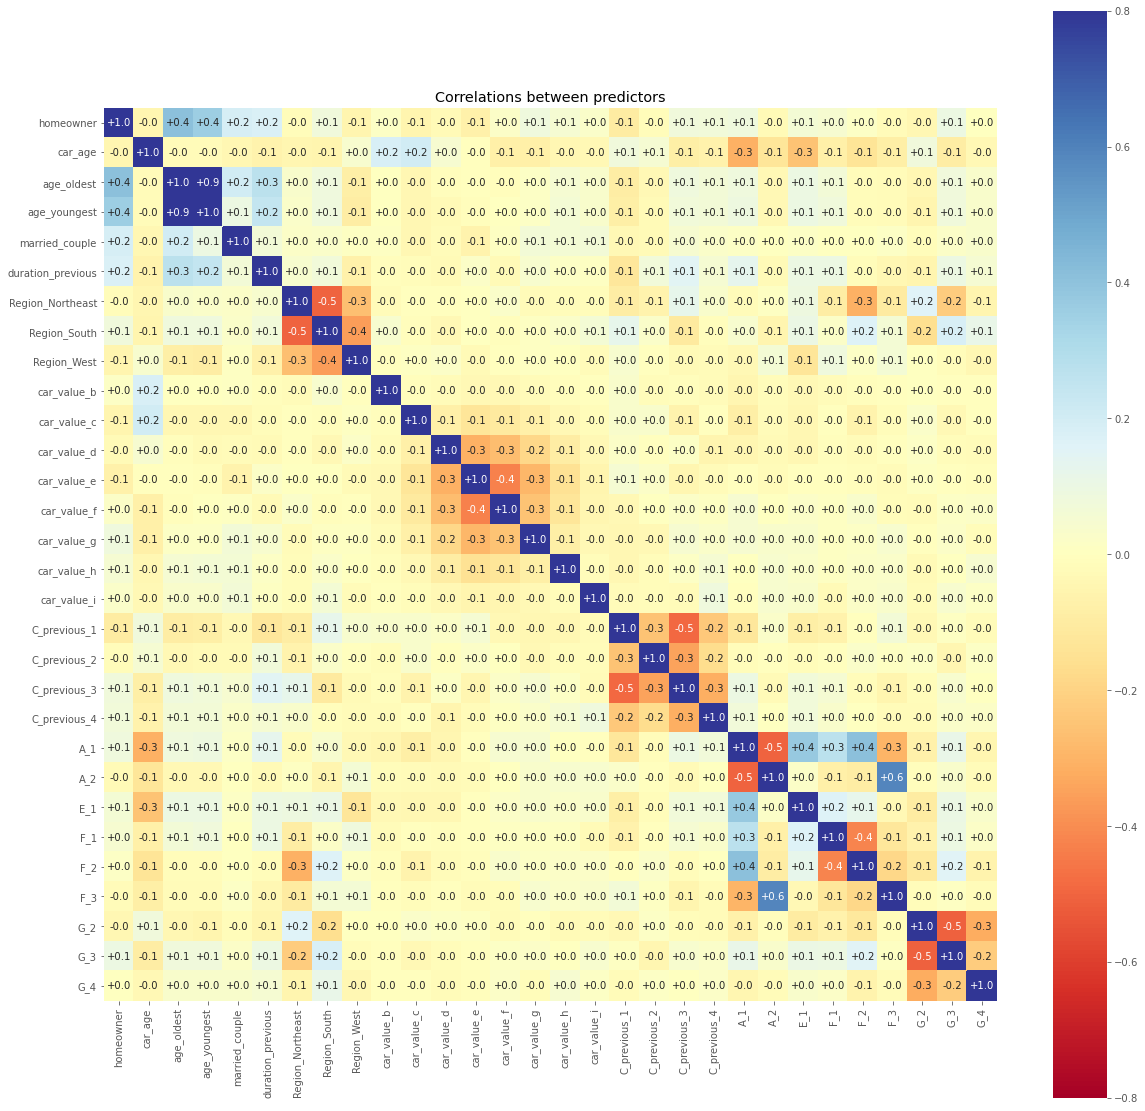

In [79]:
M = model_region.model.data.exog   # the design matrix X containing all
                                   # predictors including dummy variables
                                   # for categorical variables
param_names = model_region.model.data.param_names # parameter names
M_df = pd.DataFrame(M, columns=param_names) # as a pandas data frame

# subset of predictors to plot:-------------------------------
predictors = list()
for col in train_region.columns:
    if col == "cost":continue
#     if "car_value" in col: 
#         predictors = predictors + [f"{col}*age_youngest"]
#         continue
    predictors = predictors + [f"{col}"]

print(predictors)

M_sub = M_df[predictors]
# print(M_sub.head())
#-----------------------------------------
plt.figure(figsize=(20,20))
sns.heatmap(M_sub.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-0.8, vmax=0.8, fmt="+.1f")
plt.title("Correlations between predictors")

If we check only those variables that are numerical and were not transformed through one-hot-encoding, we have the following correlation matrix:

Text(0.5, 1.0, 'Correlations between predictors')

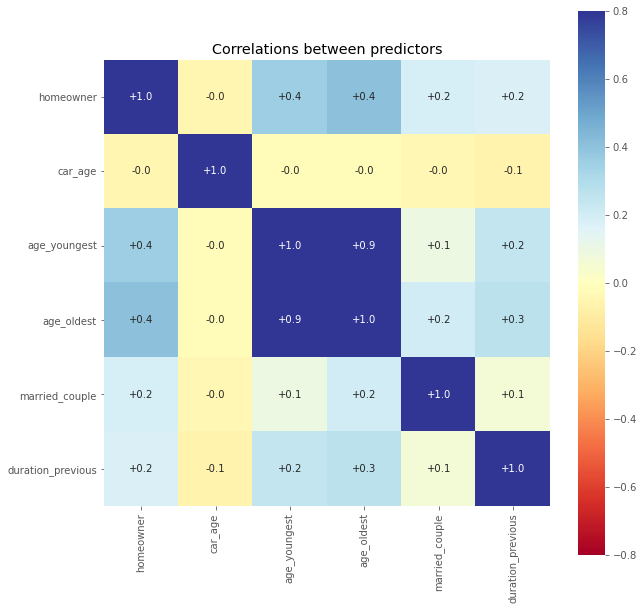

In [82]:
# subset of predictors to plot:-------------------------------
predictors = ["homeowner","car_age","age_youngest","age_oldest","married_couple", "duration_previous"]

M_sub = M_df[predictors]
# print(M_sub.head())
#-----------------------------------------
plt.figure(figsize=(10,10))
sns.heatmap(M_sub.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-0.8, vmax=0.8, fmt="+.1f")
plt.title("Correlations between predictors")

**Answer.** 

We can clearly see how age_youngest is highly correlated to age_oldest.

----------

#### 8.3:

Refit `model_region` after dropping these redundant predictor(s); call this `model_region_no_oldest`.

In [84]:
df_corr = df3.drop(columns=["age_oldest"],axis=1)

columns_to_dummy = ["Region","car_value","C_previous","A","E","F","G"]
df_dummy_corr = pd.get_dummies(df_corr,columns=columns_to_dummy, drop_first=True) #Use drop_first to drop the first category

np.random.seed(1337)

ndata = len(df_dummy_corr)

idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train_corr     = df_dummy_corr.iloc[idx_train] # the training data set
test_corr      = df_dummy_corr.iloc[idx_test]  # the test data set
print(train_corr.shape)
print(test_corr.shape)

(12386, 30)
(3097, 30)


In [85]:
mod5 = "cost ~"
for col in train_corr.columns:
    if col == "cost":continue
    if "car_value" in col: 
        mod5 = mod5 + f" {col}*age_youngest +"
        continue
    mod5 = mod5 + f" {col} +"

mod5 = mod5[:-1] #Remove last + symbol

mod5 = mod5 + "+ I(age_youngest**2) + I(car_age**2)"

print(mod5)

cost ~ homeowner + car_age + age_youngest + married_couple + duration_previous + Region_Northeast + Region_South + Region_West + car_value_b*age_youngest + car_value_c*age_youngest + car_value_d*age_youngest + car_value_e*age_youngest + car_value_f*age_youngest + car_value_g*age_youngest + car_value_h*age_youngest + car_value_i*age_youngest + C_previous_1 + C_previous_2 + C_previous_3 + C_previous_4 + A_1 + A_2 + E_1 + F_1 + F_2 + F_3 + G_2 + G_3 + G_4 + I(age_youngest**2) + I(car_age**2)


In [86]:
model_region_no_oldest = smf.ols(formula=mod5, data=train_corr).fit()
model_region_no_oldest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     189.8
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:28:09   Log-Likelihood:                -62434.
No. Observations:               12386   AIC:                         1.249e+05
Df Residuals:                   12346   BIC:                         1.252e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  702.4073     12.354     56.857      0.000     678.192     726.623
homeowner                  -13.1421      0.747    -17.599      0.000     -14.606     -11.678
car_age                     -1.3895      0.148     -9.370      0.000      -1.680      -1.099
age_youngest                -2.6169      0.298     -8.793      0.000      -3.200      -2.034
married_couple              -4.6592      0.856     -5.446      0.000      -6.336      -2.982
duration_previous           -1.3879      0.078    -17.841      0.000      -1.540      -1.235
Region_Northeast            32.5233      1.236     26.318      0.000      30.101      34.946
Region_South                23.8058      1.026     23.195      0.000      21.794      25.818
Region_West                 13.5019      1.200     11.253      0.000      11.150      15.854
car_value_b                -80.5500     22.211     -3.627      0.000    -124.087     -37.013
car_value_b:age_youngest     0.5843      0.478      1.223      0.221      -0.352       1.521
car_value_c                -31.9800     12.896     -2.480      0.013     -57.259      -6.701
car_value_c:age_youngest     0.0533      0.295      0.180      0.857      -0.526       0.632
car_value_d                -42.1849     12.219     -3.452      0.001     -66.137     -18.233
car_value_d:age_youngest     0.3875      0.278      1.396      0.163      -0.157       0.932
car_value_e                -34.3324     12.138     -2.829      0.005     -58.125     -10.540
car_value_e:age_youngest     0.2325      0.276      0.843      0.399      -0.308       0.773
car_value_f                -32.8360     12.169     -2.698      0.007     -56.689      -8.983
car_value_f:age_youngest     0.1996      0.277      0.722      0.470      -0.342       0.742
car_value_g                -25.1657     12.307     -2.045      0.041     -49.289      -1.042
car_value_g:age_youngest     0.1234      0.279      0.442      0.658      -0.424       0.670
car_value_h                 -7.0963     13.165     -0.539      0.590     -32.902      18.709
car_value_h:age_youngest    -0.1040      0.293     -0.355      0.722      -0.678       0.470
car_value_i                 38.2503     21.076      1.815      0.070      -3.061      79.562
car_value_i:age_youngest    -0.4598      0.430     -1.070      0.285      -1.302       0.383
C_previous_1                -6.1331      1.703     -3.600      0.000      -9.472      -2.794
C_previous_2               -16.6132      1.813     -9.162      0.000     -20.167     -13.059
C_previous_3               -19.6958      1.692    -11.641      0.000     -23.012     -16.379
C_previous_4               -27.6853      1.864    -14.852      0.000     -31.339     -24.031
A_1                         40.4830      1.380     29.331      0.000      37.778      43.188
A_2           

In [87]:
print("The R-squared for model_region_no_oldest is ",model_region_no_oldest.rsquared)
print("The AIC for model_region_no_oldest is ",model_region_no_oldest.aic)

The R-squared for model_region_no_oldest is  0.3748455912929892
The AIC for model_region_no_oldest is  124947.56142392773


**Answer.**

----------

#### 8.4

What would you do to diagnose the `model_region_no_oldest` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)

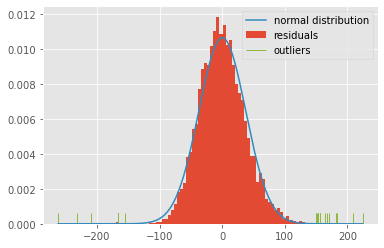

In [88]:
plt.hist(model_region_no_oldest.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label="residuals" # label for legend
    )
# now plot the normal distribution for comparison
xx = np.linspace(model_region_no_oldest.resid.min(), model_region_no_oldest.resid.max(), num=1000)
plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(model_region_no_oldest.scale)),
    label="normal distribution")

outliers = np.abs(model_region_no_oldest.resid)>4*np.sqrt(model_region_no_oldest.scale)

sns.rugplot(model_region_no_oldest.resid[outliers],
            color="C5", # otherwise the rugplot has the same color as the histogram
            label="outliers")

plt.legend(loc="upper right");

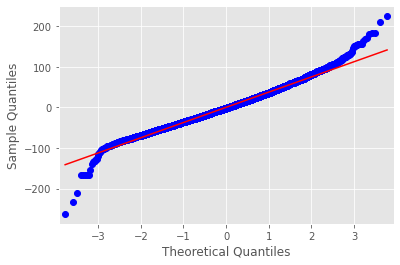

In [89]:
sm.qqplot(model_region_no_oldest.resid, line="s");

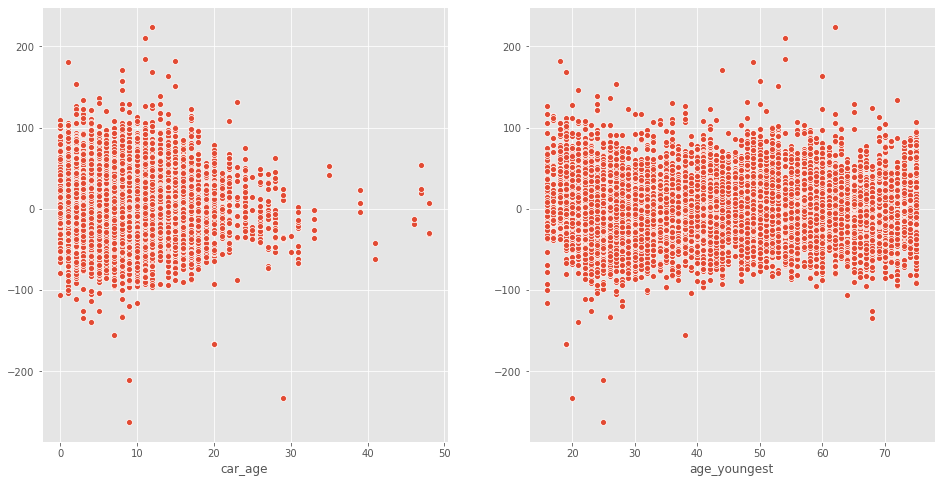

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,8))

sns.scatterplot(x='car_age',y=model_region_no_oldest.resid.values,data=train_corr, ax=ax[0])
# plt.xlabel("car age")
# plt.ylabel("residuals")
sns.scatterplot(x='age_youngest',y=model_region_no_oldest.resid.values,data=train_corr, ax=ax[1])
plt.show()

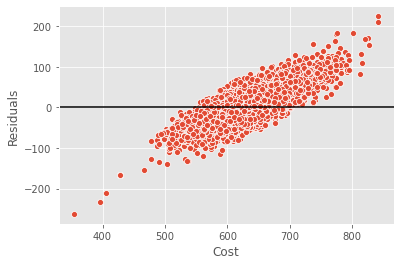

In [91]:
sns.scatterplot(train_corr["cost"], model_region_no_oldest.resid.values)
plt.ylabel("Residuals")
plt.xlabel("Cost")
plt.axhline(0, color="black")
plt.show()

**Answer.**

From the previous plots we can see how the residuals are not very skewed as can be seen in the values of Kurtosis statistic and Skew. Nevertheless the, when plotting the residuals against some of the variables, we notice some outliers above and below 0. Nevertheless, they seem to be generally evenly distributed around 0.

We can also see from the QQ plot how the model has little tails in both ends of the quantiles. It is nevertheless, not obvious that a great improvement can be achieved by further transforming the independent variables of our model.

----------

### Exercise 9:

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model_region_no_oldest`. What value do you get?

In [92]:
price,fitted_lambda = stats.boxcox(train_corr['cost'])
round(fitted_lambda,2)

0.5

**Answer.**

From the box-cox transformation, we get a value of 0.5, which points towards a square root transformation of the "cost" variable.

----------

#### 9.2

Refit `model_region_no_oldest`, but now with the transformation as suggested by the Box-Cox. Call it `model_region_no_oldest_box_cox`.

In [93]:
mod6 = "np.sqrt(cost) ~"
for col in train_corr.columns:
    if col == "cost":continue
    if "car_value" in col: 
        mod6 = mod6 + f" {col}*age_youngest +"
        continue
    mod6 = mod6 + f" {col} +"

mod6 = mod6[:-1] #Remove last + symbol

mod6 = mod6 + "+ I(age_youngest**2) + I(car_age**2)"

print(mod6)

np.sqrt(cost) ~ homeowner + car_age + age_youngest + married_couple + duration_previous + Region_Northeast + Region_South + Region_West + car_value_b*age_youngest + car_value_c*age_youngest + car_value_d*age_youngest + car_value_e*age_youngest + car_value_f*age_youngest + car_value_g*age_youngest + car_value_h*age_youngest + car_value_i*age_youngest + C_previous_1 + C_previous_2 + C_previous_3 + C_previous_4 + A_1 + A_2 + E_1 + F_1 + F_2 + F_3 + G_2 + G_3 + G_4 + I(age_youngest**2) + I(car_age**2)


In [94]:
model_region_no_oldest_box_cox = smf.ols(formula=mod6, data=train_corr).fit()
model_region_no_oldest_box_cox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.sqrt(cost)   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     191.2
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:28:36   Log-Likelihood:                -13872.
No. Observations:               12386   AIC:                         2.782e+04
Df Residuals:                   12346   BIC:                         2.812e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   26.4795      0.245    108.102      0.000      25.999      26.960
homeowner                   -0.2615      0.015    -17.659      0.000      -0.290      -0.232
car_age                     -0.0270      0.003     -9.190      0.000      -0.033      -0.021
age_youngest                -0.0509      0.006     -8.633      0.000      -0.063      -0.039
married_couple              -0.0940      0.017     -5.542      0.000      -0.127      -0.061
duration_previous           -0.0274      0.002    -17.779      0.000      -0.030      -0.024
Region_Northeast             0.6498      0.025     26.518      0.000       0.602       0.698
Region_South                 0.4775      0.020     23.464      0.000       0.438       0.517
Region_West                  0.2731      0.024     11.480      0.000       0.226       0.320
car_value_b                 -1.6419      0.440     -3.728      0.000      -2.505      -0.779
car_value_b:age_youngest     0.0117      0.009      1.232      0.218      -0.007       0.030
car_value_c                 -0.6178      0.256     -2.416      0.016      -1.119      -0.117
car_value_c:age_youngest     0.0005      0.006      0.084      0.933      -0.011       0.012
car_value_d                 -0.8246      0.242     -3.404      0.001      -1.300      -0.350
car_value_d:age_youngest     0.0072      0.006      1.307      0.191      -0.004       0.018
car_value_e                 -0.6725      0.241     -2.794      0.005      -1.144      -0.201
car_value_e:age_youngest     0.0042      0.005      0.768      0.443      -0.007       0.015
car_value_f                 -0.6434      0.241     -2.667      0.008      -1.116      -0.170
car_value_f:age_youngest     0.0035      0.005      0.647      0.517      -0.007       0.014
car_value_g                 -0.4936      0.244     -2.023      0.043      -0.972      -0.015
car_value_g:age_youngest     0.0021      0.006      0.371      0.711      -0.009       0.013
car_value_h                 -0.1377      0.261     -0.527      0.598      -0.649       0.374
car_value_h:age_youngest    -0.0024      0.006     -0.414      0.679      -0.014       0.009
car_value_i                  0.7030      0.418      1.682      0.093      -0.116       1.522
car_value_i:age_youngest    -0.0085      0.009     -0.995      0.320      -0.025       0.008
C_previous_1                -0.1150      0.034     -3.405      0.001      -0.181      -0.049
C_previous_2                -0.3211      0.036     -8.932      0.000      -0.392      -0.251
C_previous_3                -0.3850      0.034    -11.476      0.000      -0.451      -0.319
C_previous_4                -0.5430      0.037    -14.692      0.000      -0.615      -0.471
A_1                          0.8117      0.027     29.660      0.000       0.758       0.865
A_2           

In [95]:
print("The R-squared for model_region_no_oldest_box_cox is ",model_region_no_oldest_box_cox.rsquared)
print("The AIC for model_region_no_oldest_box_cox is ",model_region_no_oldest_box_cox.aic)

The R-squared for model_region_no_oldest_box_cox is  0.37659042368445805
The AIC for model_region_no_oldest_box_cox is  27824.635424479413


**Answer.**

From this last model, we can notice several things: the skew is almost half of the model without the box-cox transformation. Also, obtaining a slightly higher R-squared, the AIC decreased in one order.

----------

## Conclusion

In this, you practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. You excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 

In [96]:
def MAE(prediction,true_values):
    return np.mean(                                                      # Mean
                np.abs(                                                   # Absolute
                        prediction-true_values                            # Error
                    )
                )

print("MAE between model_region_no_oldest and true cost:",MAE((model_region_no_oldest.predict(test_corr)) ,test_corr.cost))

print("MAE between square root of model_region_no_oldest_box_cox and sqrt of true cost:",MAE(model_region_no_oldest_box_cox.predict(test_corr) ,np.sqrt(test_corr.cost)))
print("MAE between (model_region_no_oldest_box_cox)^2 and true cost:",MAE((model_region_no_oldest_box_cox.predict(test_corr))**2 ,test_corr.cost))

MAE between model_region_no_oldest and true cost: 29.393905076819863
MAE between square root of model_region_no_oldest_box_cox and sqrt of true cost: 0.5833341721919577
MAE between (model_region_no_oldest_box_cox)^2 and true cost: 29.335899332586916


In [97]:
def MAPE(prediction,true_value):
    return np.mean(                                           # Mean
        np.abs(                                               # Absolute
               (prediction-true_value)/true_value             # Error
            )*100                                            # Percentage
    )

print("MAPE between model_region_no_oldest and true cost:",MAPE((model_region_no_oldest.predict(test_corr)) ,test_corr.cost))

print("MAPE between square root of model_region_no_oldest_box_cox and sqrt of true cost:",MAPE(model_region_no_oldest_box_cox.predict(test_corr) ,np.sqrt(test_corr.cost)))
print("MAPE between (model_region_no_oldest_box_cox)^2 and true cost:",MAPE((model_region_no_oldest_box_cox.predict(test_corr))**2 ,test_corr.cost))

MAPE between model_region_no_oldest and true cost: 4.67820697990333
MAPE between square root of model_region_no_oldest_box_cox and sqrt of true cost: 2.3265377990333445
MAPE between (model_region_no_oldest_box_cox)^2 and true cost: 4.664240386687179


In [98]:
def RMSE(prediction,true_values):
    
    return np.sqrt(                                                          # Root
            np.mean(                                                      # Mean
                np.square(                                                # Squared
                         prediction-true_values                           # Error
                )
            )
        )

print("RMSE between model_region_no_oldest and true cost:",RMSE((model_region_no_oldest.predict(test_corr)) ,test_corr.cost))

print("RMSE between square root of model_region_no_oldest_box_cox and sqrt of true cost:",RMSE(model_region_no_oldest_box_cox.predict(test_corr) ,np.sqrt(test_corr.cost)))
print("RMSE between (model_region_no_oldest_box_cox)^2 and true cost:",RMSE((model_region_no_oldest_box_cox.predict(test_corr))**2 ,test_corr.cost))

RMSE between model_region_no_oldest and true cost: 37.82790377162971
RMSE between square root of model_region_no_oldest_box_cox and sqrt of true cost: 0.7518584535121574
RMSE between (model_region_no_oldest_box_cox)^2 and true cost: 37.791180040852076


From the evaluation of different errors above between the box-cox transformed model and the one without transformation, we can see a slight performance in each error measure using the box-cox transformed model.